In [12]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [13]:
df = pd.read_csv('marketing_spend.csv')

In [14]:
df.head()

,Date,Marketing_Spend_1000s,Employee_Count,Product_Rating,Customer_Acquisition_Cost,Quarterly_Revenue,Annual_Revenue,Customer_Lifetime_Value
0,2024-01-01,43.708611,18.250200,7.283455,1910.442649,265.106375,273.074702,354.029924
1,2024-01-02,95.564288,22.329398,5.824867,9132.533060,687.783503,567.896906,1012.873825
2,2024-01-03,75.879455,43.301150,3.785749,5757.691655,518.959402,520.257186,800.570271
3,2024-01-04,63.879264,19.261490,8.324155,4080.560315,378.920094,389.676220,577.055925
4,2024-01-05,24.041678,12.627174,7.162581,578.002264,169.671985,178.742889,193.317841


# Linear Regression

Linear Regression Accuracy: 0.844


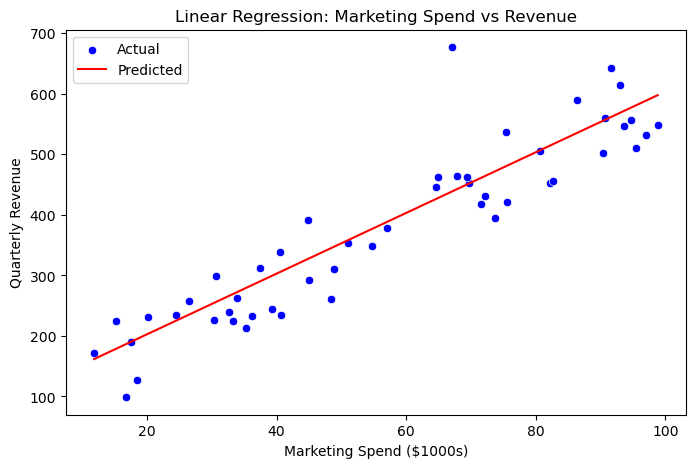

In [15]:
# Select features and target variable
X = df[['Marketing_Spend_1000s']]  # Independent variable
y = df['Quarterly_Revenue']  # Dependent variable

# train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Linear Regression Accuracy:', round(r2_score(y_test, y_pred),3))

# Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['Marketing_Spend_1000s'], y=y_test, label='Actual', color='blue')
sns.lineplot(x=X_test['Marketing_Spend_1000s'], y=y_pred, label='Predicted', color='red')
plt.xlabel("Marketing Spend ($1000s)")
plt.ylabel("Quarterly Revenue")
plt.title("Linear Regression: Marketing Spend vs Revenue")
plt.legend()
plt.show()

# Multiple Regression

Multiple Linear Regression Accuracy: 0.938


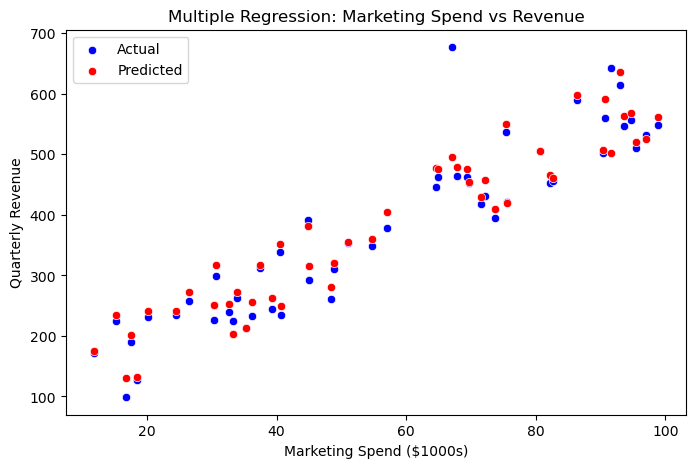

In [16]:

# Select features and target variable
X = df[['Marketing_Spend_1000s', 'Employee_Count','Product_Rating']]  # Independent variables
y = df['Quarterly_Revenue']  # Dependent variable

# train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

# Initialize and train the Multiple Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Multiple Linear Regression Accuracy:', round(r2_score(y_test, y_pred),3))

# Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['Marketing_Spend_1000s'], y=y_test, label='Actual', color='blue')
sns.scatterplot(x=X_test['Marketing_Spend_1000s'], y=y_pred, label='Predicted', color='red')
plt.xlabel("Marketing Spend ($1000s)")
plt.ylabel("Quarterly Revenue")
plt.title("Multiple Regression: Marketing Spend vs Revenue")
plt.legend()
plt.show()


# Polynomial Regression

Linear Regression Accuracy: 0.966


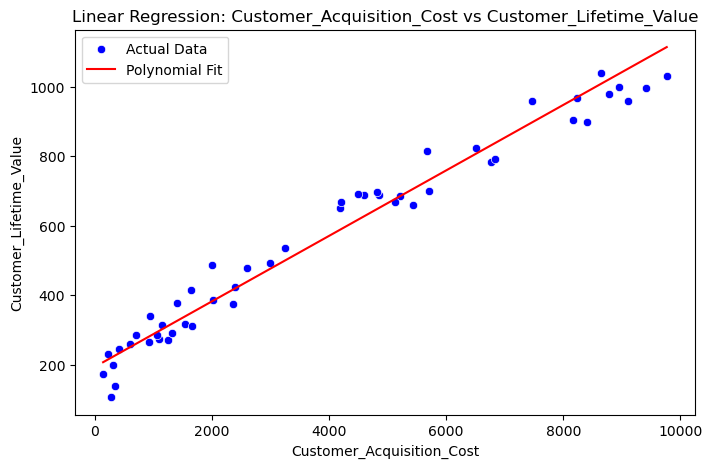

In [18]:
# Select features and target variable
X = df[['Customer_Acquisition_Cost']]
y = df['Customer_Lifetime_Value']

# train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Linear Regression Accuracy:', round(r2_score(y_test, y_pred),3))

# Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['Customer_Acquisition_Cost'], y=y_test, label='Actual Data', color='blue')
sns.lineplot(x=X_test['Customer_Acquisition_Cost'], y=y_pred, label='Polynomial Fit', color='red')
plt.xlabel("Customer_Acquisition_Cost")
plt.ylabel("Customer_Lifetime_Value")
plt.title("Linear Regression: Customer_Acquisition_Cost vs Customer_Lifetime_Value")
plt.legend()
plt.show()

Polynomial Regression Accuracy: 0.977


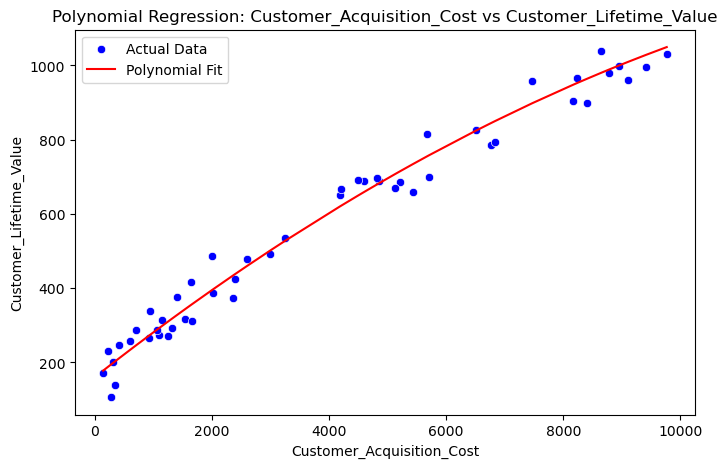

In [27]:
# Create polynomial features (degree 2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Initialize and train the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y_train)

y_pred = model.predict(X_poly_test)
print('Polynomial Regression Accuracy:', round(r2_score(y_test, y_pred),3))

# Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['Customer_Acquisition_Cost'], y=y_test, label='Actual Data', color='blue')
sns.lineplot(x=X_test['Customer_Acquisition_Cost'], y=y_pred, label='Polynomial Fit', color='red')
plt.xlabel("Customer_Acquisition_Cost")
plt.ylabel("Customer_Lifetime_Value")
plt.title("Polynomial Regression: Customer_Acquisition_Cost vs Customer_Lifetime_Value")
plt.legend()
plt.show()

# Lasso, Ridge and ElasticNet Regression

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
df = fetch_california_housing()

In [4]:
X = pd.DataFrame(df['data'], columns = df['feature_names'])
y = pd.DataFrame(df['target'], columns = df['target_names'])

In [6]:
X.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [31]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [60]:
# train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

# Fit Lasso Regression
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print('Lasso Accuracy: ',r2_score(y_test, y_pred_lasso))

# Fit Ridge Regression
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print('Ridge Accuracy: ',r2_score(y_test, y_pred_ridge))

# Fit Elastic Net Regression
elastic_net = ElasticNet(alpha = 0.01)
elastic_net.fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)
print('ElasticNet Accuracy: ',r2_score(y_test, y_pred_elastic))


Lasso Accuracy:  0.5845196673976367
Ridge Accuracy:  0.5757944553633931
ElasticNet Accuracy:  0.582274410206021
